# Python Machine Learning  - Multiple Linear Regression

<p><a name="sections"></a></p>


## Sections


 - <a href="#multi_reg">Multiple Linear Regression - Model</a><br>
 - <a href="#matrix">Least Square in Matrix Notation</a><br>
 - <a href="#multi_sklearn">Multiple Linear Regression in Scikit-Learn</a><br>
    - <a href="#ex2">Exercise: Advertising Data</a><br>
 - <a href="#case">Case Study: Boston Dataset</a><br>
    - <a href="#descriptive">Descriptive Statistics</a><br>
    - <a href="#ex3">Exercise: Descriptive Statistics</a><br>
    - <a href="#dummy">Categorical Input Variables</a><br>
    - <a href="#ex4">Exercise: Dummy Variables</a><br>  
 - <a href="#case">multiple linear regression with Statsmodels</a><br>      


In [1]:
#### Loading the packages to be used
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')

<p><a name="multi_reg"></a></p>
## Multiple Linear Regression - Model

- In reality, the output Y often depends on multiple input variables. Suppose that we would like to study the dependence of *Income* on both *Years of Education* and *Seniority*. Since there are two independent variables, the linear model can no longer be represented by a line -- but a **plane** in 3D:

<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/MultipleLinearRegression-Plane.png" style="height: 300px;">
*Source: James et al. Introduction to Statistical Learning (Springer 2013)*

- In general, if the output $Y$ depends on more than one input variable, say $X_1$, $X_2$, ... $X_p$, then we need to generalize our linear model as

$$\hat{Y}=\hat{\beta}_0+\sum_{i=1}^p\hat{\beta}_iX_i$$

- It is very common that we include the constant 1 in $X$ and use the notation

$$\hat{\beta}=(\hat{\beta_0}, \hat{\beta_1}, ... ,\hat{\beta_p})^T$$
$$X=(1, X_1, ..., X_p)$$

- Note that $X \text{ now becomes a } N\times (p+1)$ matrix. Then we can write the model in a matrix notation:

$$\hat{Y}=X\hat{\beta},$$

with $\hat{beta}$ being a $(p+1)\times 1$ matrix (i.e. a vector).

<p><a name="matrix"></a></p>
#### Least Square in Matrix Notation

The matrix notation is convenient for estimating:

- **residual**: In matrix notation, the RSS can be written as the following:

$$RSS(\beta)=(Y-X\beta)^T(Y- X\beta)$$

- **fitting**: Again differentiating RSS with respect to $\beta$ and setting the result to zero (why?), we get the so-called 'normal equation':

$$\hat{\beta}=(X^TX)^{-1}X^T Y$$

- **Note**: when two or more input variables are highly correlated with each other, then $X^T X$ is close to be singular (i.e. $det(X^TX)\sim 0$) and the solution $\hat{\beta}$ will be numerically unstable - any tiny fluctuations of data will cause huge changes of the model.

<p><a name="multi_sklearn"></a></p>
### Multiple Linear Regression in Scikit-Learn

- The same LinearRegression Object which deals with Simple Linear Regression also deals with Multiple Linear Regression

In [2]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

Next we create a random data set of two independent variables using the model:

$$Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$$

In [3]:
np.random.seed(1)
N = 30
## generate a random array with 2 columns
beta = np.array([2, -7, 5])
x_m = np.random.randn(N, 2)
y_m = np.dot(np.append(np.ones((N,1)), x_m, axis=1), beta) + np.random.randn(N)*4

Let’s visualize the data set in both 2D and 3D: 

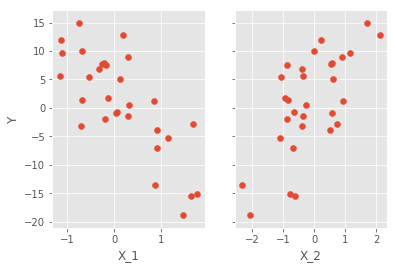

In [4]:
## use subplots to make two scatter plots side by side
_, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(x_m[:,0], y_m)
ax2.scatter(x_m[:,1], y_m)
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax2.set_xlabel('X_2')
plt.show()

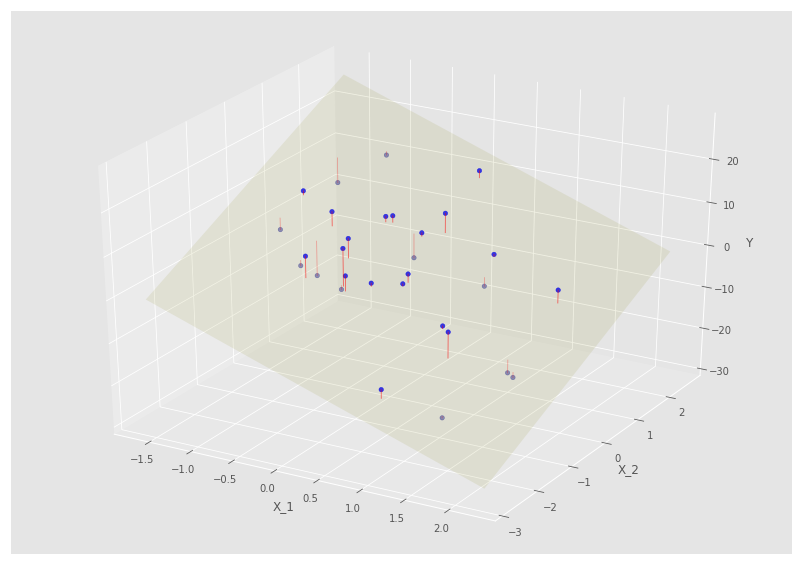

In [5]:
## 3D scatter plot

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
# plot the data points
X = np.array(list(map(lambda x: [1] + list(x), x_m)))  # Idiomatic Py3, but inefficient on Py2
up = np.where(y_m >= np.sum(X*beta, axis=1))[0]
down = np.where(y_m < np.sum(X*beta, axis=1))[0]
ax.scatter(x_m[up, 0], x_m[up, 1], y_m[up], c='blue', alpha=.8)
ax.scatter(x_m[down, 0], x_m[down, 1], y_m[down], c='Darkblue', alpha=.4)

# plot the error bars
ax = fig.gca(projection='3d')
x_up = x_m[up,:]; y_up = y_m[up]
up_kwargs = dict(color='red', alpha=.6, lw=0.8)
for i, j, k in zip(x_up[:, 0], x_up[:, 1], y_up):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **up_kwargs)
    
x_down = x_m[down,:]; y_down = y_m[down]
down_kwargs = dict(color='red', alpha=.3, lw=0.8)
for i, j, k in zip(x_down[:,0], x_down[:,1], y_down):
    ax.plot([i, i], [j, j], [k, np.dot(beta, [1, i, j])], **down_kwargs)
    
    
# plot the plane which represents the true model
x_1 = np.linspace(min(x_m[:, 0])-.5, max(x_m[:, 0])+.5, 25)
x_2 = np.linspace(min(x_m[:, 1])-.5, max(x_m[:, 1])+.5, 25)
x_1, x_2 = np.meshgrid(x_1, x_2)
x_3 = beta[1]*x_1 + beta[2]*x_2 + beta[0]
surface_kwargs = dict(rstride=100, cstride=100, color='yellow', alpha=0.1)
ax.plot_surface(x_1, x_2, x_3, **surface_kwargs)
ax.set_xlabel('X_1')
ax.set_ylabel('X_2')
ax.set_zlabel('Y')
plt.show()

**Fitting and Evaluating Multiple Linear Regression**

If the first variable `x` that we pass into `fit()` contains multiple columns, then a multiple linear model is returned. This is why the model needs to take in a 2D array as its X--to check whether the quesiton is a multi-linear regression one.

In [6]:
ols.fit(x_m, y_m)
print("beta_1, beta_2: " + str(np.round(ols.coef_, 3)))
print("beta_0: " + str(np.round(ols.intercept_, 3)))
print("RSS: %.2f" % np.sum((ols.predict(x_m) - y_m) ** 2))
print("R^2: %.5f" % ols.score(x_m, y_m))

beta_1, beta_2: [-6.619  4.436]
beta_0: 2.523
RSS: 356.34
R^2: 0.83938


- By comparing with the true model $Y = 2 - 7.0X_1 + 5.0X_2 + \epsilon$, we can see the estimated coefficients are close to the true values.

**Regression in terms of the Matrix Formula**

Let's calculate the coefficients by using the normal equation:
$$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

In [7]:
import numpy as np
## transform x to a matrix
x_m = np.mat(x_m)
## y transpose converts y into a column vector
y_m = np.mat(y_m).T
## add a column of 1’s to x
x_m = np.column_stack((np.ones([x_m.shape[0], 1]), x_m))
## matrix.I returns the inverse of that matrix
(x_m.T*x_m).I * x_m.T * y_m

matrix([[ 2.52343727],
        [-6.6191147 ],
        [ 4.43620544]])

As you can see, we get exactly the same coefficients as we get from sciki-learn.

<p><a name="ex2"></a></p>
#### Exercise : Advertising data

The Advertising data includes Sales vs TV, Radio and Newspaper.
We start with importing the data and visualizing it.

In [9]:
## load data into pandas dataframe
import pandas as pd
adver = pd.read_csv('data/adver.csv', index_col=0)
adver.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


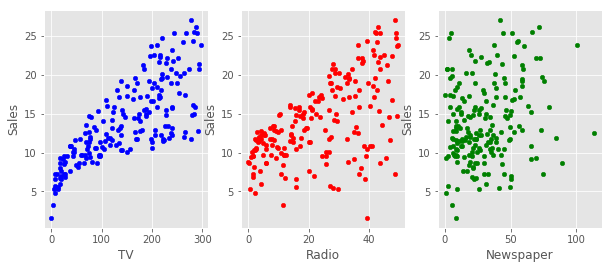

In [10]:
## Visualizing data, shown are Sales vs TV, Radio and Newspaper
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
adver.plot(ax=axes[0], kind='scatter', x='TV', y='Sales',c='b')
adver.plot(ax=axes[1], kind='scatter', x='Radio', y='Sales',c='r')
adver.plot(ax=axes[2], kind='scatter', x='Newspaper', y='Sales',c='g')
plt.show()

- Fit a multiple linear regression model with the 3 predictors.

- Find the estimated coefficients of your fitted model.

- What is the overall R^2?

- Given a new observation with the budgets 50 on TV, 100 on Radio and 30 on Newspaper, what is your prediction of the sale?


In [11]:
#### Your code here

## separate the input variables and output variables
X = adver[['TV', 'Radio', 'Newspaper']]  # input varialbe
Y = adver['Sales']  # output variable
ols.fit(X, Y)
print("Intercept: %f" %ols.intercept_)
print("Coefficients: %s" %str(ols.coef_))
print("R^2: %f" %(ols.score(X, Y)))
print("Predicted sales: %f" %(ols.predict([[50, 100, 30]])))

Intercept: 2.938889
Coefficients: [ 0.04576465  0.18853002 -0.00103749]
R^2: 0.897211
Predicted sales: 24.048999


The fitted model is:
$$Sale=0.046\times TV+0.189\times Radio−0.001\times Newspaper+2.939$$
 
While holding advertising budgets of Radio and Newspaper fixed, increasing the budget of TV by 1 unit will result in 0.046 unit's increase in sales.
Similarly, while holding TV and Newspaper fixed, increasing Radio by 1 unit will result in 0.189 unit of increase in sales.

<p><a name="case"></a></p>
## Case Study

<p><a name="descriptive"></a></p>
### Descriptive Statistics

In addition to the assumptions we have for the simple linear regression, multiple linear regression also makes a key assumption:

- Low multicollinearity among the predictors

But in reality the real world data is very unlikely to satisfy this assumption. Failing to satisfy the assumption may lead to poor model fit or even wrong result.

Below we will explore some basic descriptive statistics to understand the variables before fitting the linear model.

- Univariate analysis: involve the distribution of a single variable (mean, median, quartiles, standard deviation, etc.)
- Bivariate analysis: explore the pairwise relationship between different variables (correlation, covariance, etc.)

<p><a name="ex3"></a></p>
### Exercise: Descriptive Statistics

- The 1970s' Boston House Prices dataset includes 506 instances with 11 continuous variables, 1 categorical variable (RAD) and 1 binary-valued variable (CHAS)

- RAD: index of accessibility to radial highways

- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- AGE - proportion of owner-occupied units built prior to 1940

- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- CRIM - per capita crime rate by town

- DIS - weighted distances to five Boston employment centres

- INDUS - proportion of non-retail business acres per town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

- NOX - nitric oxides concentration (parts per 10 million)

- PTRATIO - pupil-teacher ratio by town

- RM - average number of rooms per dwelling

- TAX - full-value property-tax rate per $10,000

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft

- The dataset is available in scikit datasets sub-package

In [12]:
from sklearn import datasets
boston = datasets.load_boston()
import pandas as pd
X_bos = pd.DataFrame(boston.data, columns=boston.feature_names)
y_bos = pd.Series(boston.target, name='MEDV')
## use head() to check the first few rows
X_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Univariate analysis**:

- To summarize a continuous variable we will use `describe()` function

- To summarize a categorical variable we will use `value_counts()` function

In [13]:
#### Your code here

## Create another variable X which only contains continuous variables
X_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [14]:
#### Your code here

print(X_bos['CHAS'].value_counts())
print(X_bos['RAD'].value_counts())

0.0    471
1.0     35
Name: CHAS, dtype: int64
24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64


**Bivariate analysis and Visualization**:

- Distribution of input/output variables
- Distribution of output in each class of categorical varialbes
- Correlations between continuous variables

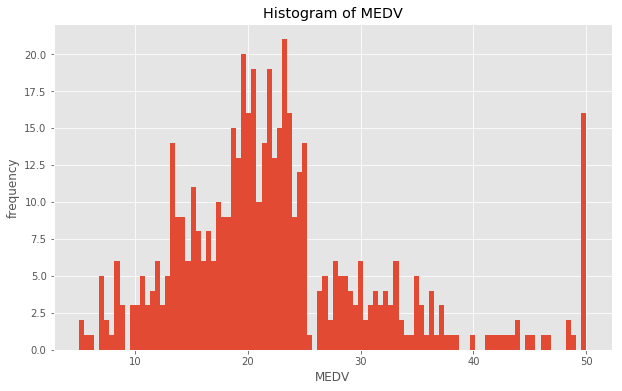

In [15]:
fig = plt.figure(figsize=(10,6))
plt.ylabel('frequency')
plt.xlabel('MEDV',)
plt.title('Histogram of MEDV')
y_bos.hist(bins=100)
plt.show()

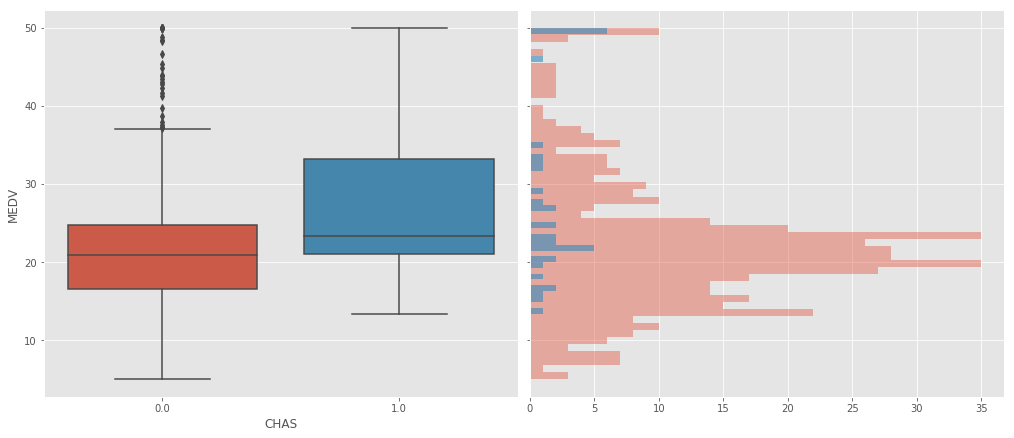

In [16]:
import matplotlib.gridspec as gridspec
import seaborn as sns

CHAS_0 = y_bos[X_bos.CHAS==0]
CHAS_1 = y_bos[X_bos.CHAS==1]

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(1, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=y_bos, x=X_bos.CHAS, ax=ax1)
ylim = ax1.get_ylim()
hist_kwargs = dict(orientation='horizontal', bins=50, ax=ax2)
CHAS_0.hist(alpha=0.4, **hist_kwargs)
CHAS_1.hist(alpha=0.6, **hist_kwargs)
ax2.set_ylim((ylim[0], ylim[1]))
for tick in ax2.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = False
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0)
plt.show()

- CHAS=1 has higher housing value than CHAS=0
- Instances with CHAS=0 is much more than CHAS=1

Below we plot the distribution of MEDV in each class of RAD.

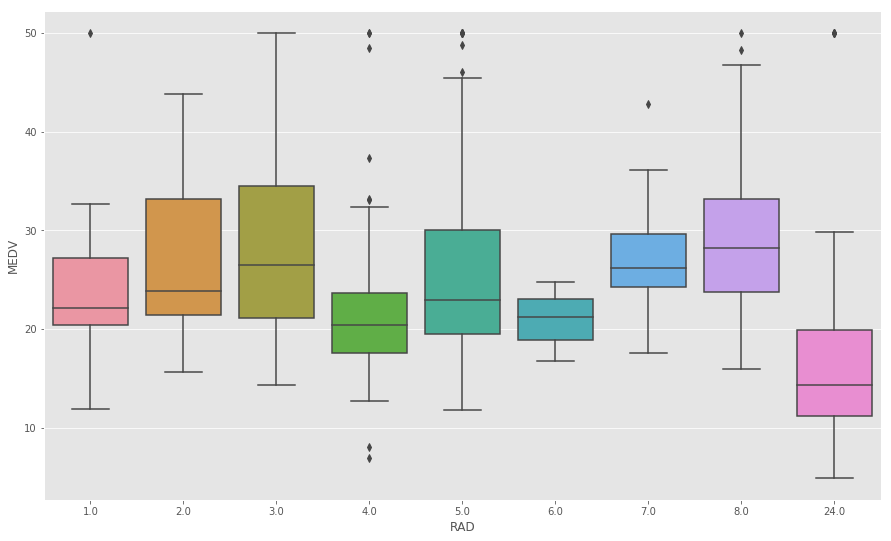

In [17]:
fig = plt.figure(figsize=(15, 9))
sns.boxplot(y=y_bos, x=X_bos.RAD)
plt.show()

- RAD 3 has the top housing value compare to others.
- Housing value in RAD 24 is significantly lower than the others.

//anaconda/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


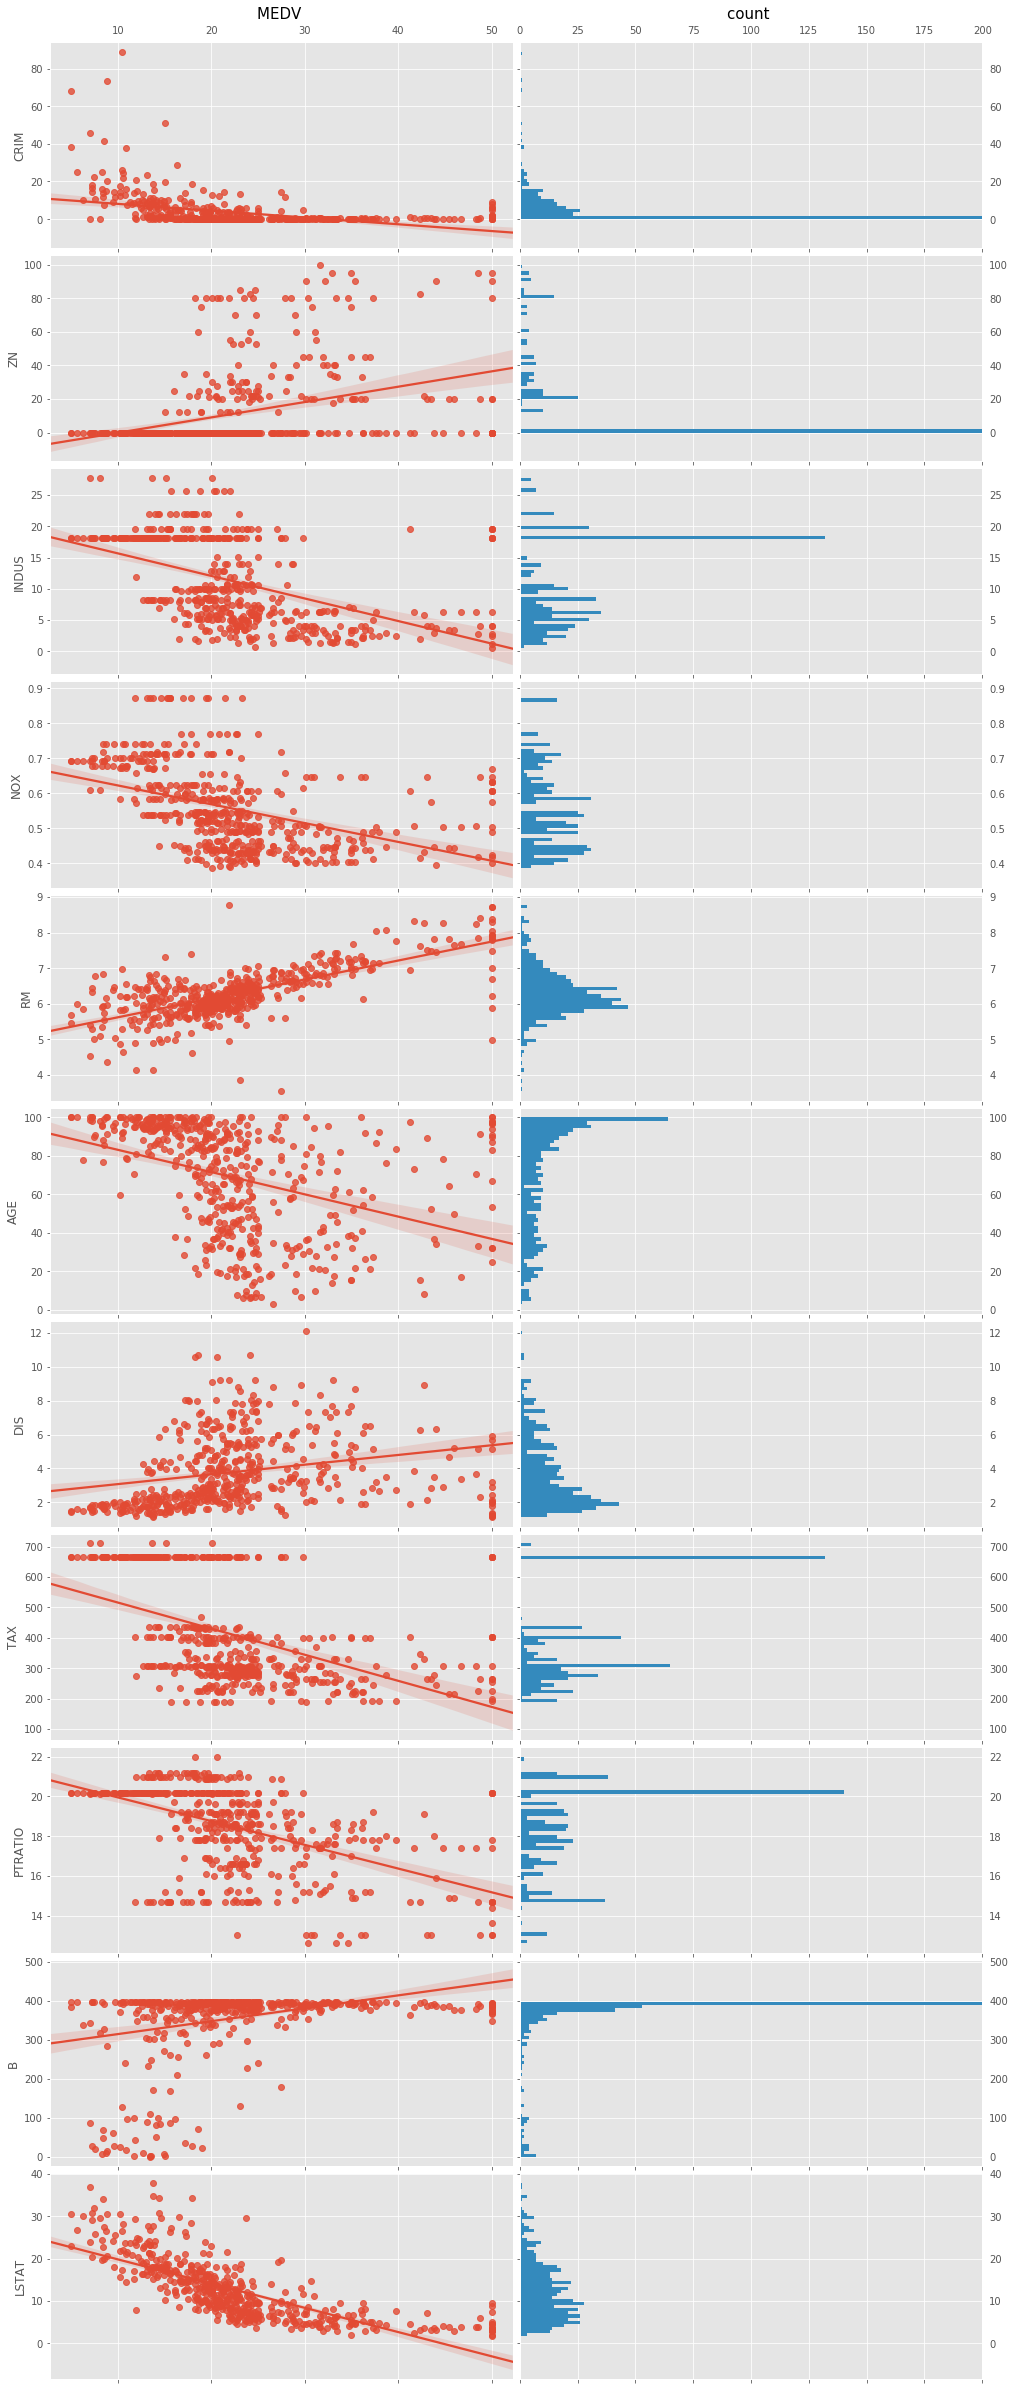

In [18]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.pyplot as plt

X_1 = X_bos.drop('CHAS', 1).drop('RAD', 1)

fig = plt.figure(figsize=(14, 33))
gs = gridspec.GridSpec(11, 2)

for i in range(11):
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])    
    sns.regplot(y_bos, X_1.iloc[:, i], ax=ax1)
    ax1.set_title('')
    ax1.set_xlabel('')
    ylim = ax1.get_ylim()   
    X_1[X_1.columns[i]].hist(bins=50, ax=ax2, orientation='horizontal')    
    ax2.set_ylim((ylim[0], ylim[1]))
    ax2.set_xlabel('')
    ax2.set_xlim((0, 200))
    for tick in ax2.yaxis.get_major_ticks():
        tick.label1On = False
        tick.label2On = True
    if i != 0:
        ax1.set_xticklabels([''])
        ax2.set_xticklabels([''])
    else:
        ax1.set_title('MEDV \n', size=15)
        ax2.set_title('count \n', size=15)
        for tick in ax1.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
        for tick in ax2.xaxis.get_major_ticks():
            tick.label1On = False
            tick.label2On = True
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

The graphs above show the distribution of the continuous attributes and their relationship to housing values:

- More than half of CRIM and ZN are concentrated between 0 and 1.
- The relationship between RM, LSTAT and housing value is apparent.
- Some relationships are not that significant, such as CRIM and ZN.

<p><a name="dummy"></a></p>
### Categorical Input Variables

So far all the input variables we’ve seen are continuous variables.
It’s possible that we will have categorical (aka, qualitative) input variables. 

- For example, if we want to explore the relationship between smoking and lung cancer rate, the variable 'smoking' usually has two categories, “yes” and “no”.

- The binary categorical variables can be effectively coded as integers. For instance [“yes”, “no”] are often coded as [1, 0].

- When there are more than two categories, we cannot simply code the variables by more integers,  as scikit-learn estimators expects continuous input, and would interpret the categories as being ordered, which is often not desired. 

The most useful and commonly used coding is via introducing dummy variables: a $K$-level categorical variable is represented by K binary variables, only one of which is on at a time. This is called 1-of-K encoding scheme.

- Scikit-learn provides a class called OneHotEncoder which encodes categorical variables using 1-of-K scheme, but it only accepts integer-value features as input.

- We will be using `pandas.get_dummies()` function to convert categorical variables. This works fine if the data size is not big

Example - Assuming a laptop sales data set has a feature called web browser which records the types of pre-installed web browser for 5 different laptop models.


In [19]:
import pandas as pd
browser = pd.Series(["Safari","Chrome", "IE", "IE", "Safari"])
browser_dummy = pd.get_dummies(browser)
browser_dummy

,Chrome,IE,Safari
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


- In the previous example we generate 3 dummy variables, as the number of categories is 3. For each single record we only have one “1” and the rest are all 0’s.

- We can consider one category as the base and drop it without losing any information since these dummified features are linearly dependent (summing to one).

- So the following dummy variables will be sufficient.

In [20]:
browser_dummy.drop('Chrome', 1)

,IE,Safari
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1


<p><a name="ex4"></a></p>
#### Exercise: Dummy Variables

To apply multiple linear regression, you’ll need to transform the categorical variable RAD to dummy variables. CHAS is binary and therefore we don’t need to convert it to dummy variables.

- Dummify the RAD column and put it back with the other features.

In [21]:
df = X_bos.copy()
#### Isolate the RAD column and dummify it into a data frame with columns RAD__1.0,...., RAD__24.0
#### drop the RAD__1.0 column before concatenating with df (the original RAD has to be dropped, too)
#### use head to print the top 5 lines, as is shown below
#### Your code here
#pd.get_dummies?
rad = pd.get_dummies(df['RAD'], prefix='RAD', prefix_sep='__')
rad = rad.drop('RAD__1.0', axis=1)
rad.head()
df = pd.concat([df.drop('RAD', axis=1), rad], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,RAD__2.0,RAD__3.0,RAD__4.0,RAD__5.0,RAD__6.0,RAD__7.0,RAD__8.0,RAD__24.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,0,1,0,0,0,0,0,0


In [22]:
pd.DataFrame(df.columns, columns=['Column_Name'])

,Column_Name
0,CRIM
1,ZN
2,INDUS
3,CHAS
4,NOX
5,RM
6,AGE
7,DIS
8,TAX
9,PTRATIO


Below we split the data into **train** set and the **test** set. Then we will train our models on the train set and evaluate it with the test set. This is a standard process for model evaluation, which we will discuss with more details in a separate session.

In [23]:
try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y_bos, test_size=0.3, random_state=42)

- Do **multiple linear regression** with a new data set.
- Report the coefficient of determination from the training and testing sets.

In [24]:
#### Your code here
from sklearn.linear_model import LinearRegression 

ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.754141
--------------------------------------------------
R^2 for test  set: 0.714336


# OverFit
- The discrepency of $R^2$ between the train and test sets is usually called **over-fitting**

## Detecting Multicollinearity Among Features
- We can detect multicollinearity by running a separate **MLR** using each continuous feature as a target
- The $R^2$ score of each **MLR** gauges whether each feature is linear dependent on the others

In [25]:
continuous_features = ['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
scores = {}
ols2 = LinearRegression()
from sklearn.metrics import r2_score
for feature_name in continuous_features:
                df2     = df.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   

Text(0.5,1,'$R^2$ of a continuous feature against the other features')

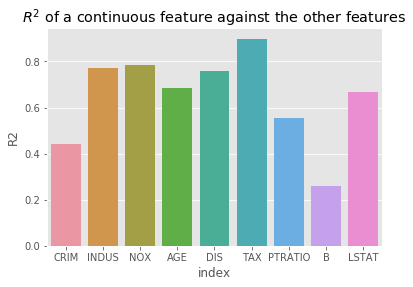

In [26]:
sns.barplot(x='index', y='R2', data=pd.DataFrame(scores, index=['R2']).T.reset_index())
plt.title('$R^2$ of a continuous feature against the other features')

## High Multicollinearity Is the Main Reason of Multi-Variable Linear Model Overfitting
- Because multicollinearity, the model coefficients estimated by the LinearRegression model can be very far away from 
where the true model should lie (assuming that the linearity and i.i.d Gaussian assumptions are not violated)

Below we list the coefficients for each variable.

In [27]:
colnames = df.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
CRIM,-0.134596
ZN,0.043598
INDUS,0.064662
CHAS,2.923517
NOX,-16.260766
RM,3.947485
AGE,-0.011712
DIS,-1.464337
TAX,-0.005080
PTRATIO,-0.902115


## The Meaning of Dummified Slopes
- Because a dummified feature takes boolean values (0 or 1), the slope of a binary feature has a very simple meaning
- The subset of samples which take feature value 1 forms a subgroup
- Different subgroups form a partition of the data set
- In the above examples, houses have RAD scores 1, 2, 3, 4, 5, 6, 7, 8, 24 and we can partition the houses into different subgroups
in this way
- The slope of RAD_24.0 adjusts the intercept 30.1518 upwards to 35.9627
- In other words, after dummification, each subgroup fits a linear model with an individual intercept, but the linear model
of all the subgroups share the identical slopes on the non-dummified continuous variables 

In [28]:
result.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'RAD__2.0', 'RAD__3.0', 'RAD__4.0', 'RAD__5.0',
       'RAD__6.0', 'RAD__7.0', 'RAD__8.0', 'RAD__24.0', 'intercept'],
      dtype='object')

In [29]:
slopes = result.loc[['CRIM','ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
slopes.columns = ['slope']
slopes

,slope
CRIM,-0.134596
ZN,0.043598
INDUS,0.064662
NOX,-16.260766
RM,3.947485
AGE,-0.011712
DIS,-1.464337
TAX,-0.005080
PTRATIO,-0.902115
B,0.012152


## Summary on the Slopes
- Crime rate, AGE, NOX, local tax rate, student/teacher ratio, low income residents ratio impact house price negatively
- Zoning, INDUS (non-retail business acres), black resident index impact house price positively

## Depending on whether CHAS == 1 and the RAD index, the data set can be sub-divided into 18 subgroups
- We would like to know the intercept term fitted to each sub-population of the data

In [30]:
# the sample count in each sub-population
relevant = ['CHAS', 'RAD']
X_bos[relevant+['ZN']].groupby(relevant).count()

ZN
CHAS RAD      
0.0  1.0    19
     2.0    24
     3.0    36
     4.0   102
     5.0   104
     6.0    26
     7.0    17
     8.0    19
     24.0  124
1.0  1.0     1
     3.0     2
     4.0     8
     5.0    11
     8.0     5
     24.0    8

- We notice that the CHAS == 1 house population is rather sparse, most of the counts are single digits
- CHAS == 1 and RAD == 2, 6, 7 are missing 
- The following code computes the per-group intercepts in a multi-index data frame

In [31]:
intercept = result.loc[['RAD__2.0', 'RAD__3.0', 'RAD__4.0', 'RAD__5.0', 'RAD__6.0', 'RAD__7.0', 'RAD__8.0', 'RAD__24.0']]
intercept.loc['RAD__1.0'] = 0.0
intercept = intercept + result.loc['intercept']
intercept = intercept.reset_index()
intercept2 = intercept.copy() 
intercept2['coefficient'] += float(result.loc['CHAS'])
intercept = pd.concat([intercept, intercept2], axis=0)
intercept['CHAS'] = [0]*9 + [1]*9

In [32]:
intercept = intercept.groupby(['CHAS','index']).mean()
intercept.columns = ['intercept']
intercept

intercept
CHAS index               
0    RAD__1.0   30.151808
     RAD__2.0   31.282496
     RAD__24.0  35.962705
     RAD__3.0   34.657038
     RAD__4.0   32.042686
     RAD__5.0   32.920022
     RAD__6.0   30.604760
     RAD__7.0   34.435277
     RAD__8.0   34.115608
1    RAD__1.0   33.075325
     RAD__2.0   34.206013
     RAD__24.0  38.886222
     RAD__3.0   37.580555
     RAD__4.0   34.966204
     RAD__5.0   35.843539
     RAD__6.0   33.528277
     RAD__7.0   37.358794
     RAD__8.0   37.039125

## What are the Significance of the Slope Coefficients?
- As scikit-learn does not output t-stats or confidence intervals, we need to use statsmodels for this task 

In [33]:
import statsmodels.api as sm 
X_add_const = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     51.07
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.00e-88
Time:                        12:07:13   Log-Likelihood:                -1046.3
No. Observations:                 354   AIC:                             2135.
Df Residuals:                     333   BIC:                             2216.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1518      6.558      4.598      0.0

In [34]:
ans.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,30.1518,6.558,4.598,0.000,17.251,43.052
CRIM,-0.1346,0.040,-3.329,0.001,-0.214,-0.055
ZN,0.0436,0.018,2.425,0.016,0.008,0.079
INDUS,0.0647,0.075,0.859,0.391,-0.083,0.213
CHAS,2.9235,1.038,2.816,0.005,0.881,4.966
NOX,-16.2608,4.891,-3.324,0.001,-25.883,-6.639
RM,3.9475,0.501,7.885,0.000,2.963,4.932
AGE,-0.0117,0.016,-0.717,0.474,-0.044,0.020
DIS,-1.4643,0.245,-5.976,0.000,-1.946,-0.982
TAX,-0.0051,0.005,-1.066,0.287,-0.014,0.004


In [35]:
table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float,'2.5% confidence':float, '97.5% confidence':float})
table[table['p value']<0.05]  # those coefficients with 0 lying outside their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
0,const,30.1518,6.558,4.598,0.000,17.251,43.052
1,CRIM,-0.1346,0.040,-3.329,0.001,-0.214,-0.055
2,ZN,0.0436,0.018,2.425,0.016,0.008,0.079
4,CHAS,2.9235,1.038,2.816,0.005,0.881,4.966
5,NOX,-16.2608,4.891,-3.324,0.001,-25.883,-6.639
6,RM,3.9475,0.501,7.885,0.000,2.963,4.932
8,DIS,-1.4643,0.245,-5.976,0.000,-1.946,-0.982
10,PTRATIO,-0.9021,0.172,-5.239,0.000,-1.241,-0.563
11,B,0.0122,0.003,3.675,0.000,0.006,0.019
12,LSTAT,-0.5482,0.059,-9.257,0.000,-0.665,-0.432


In [36]:
table[table['p value']>=0.05] # those coefficients with 0 lying in their CIs

,name,coef,std err,t value,p value,2.5% confidence,97.5% confidence
3,INDUS,0.0647,0.075,0.859,0.391,-0.083,0.213
7,AGE,-0.0117,0.016,-0.717,0.474,-0.044,0.020
9,TAX,-0.0051,0.005,-1.066,0.287,-0.014,0.004
13,RAD__2.0,1.1307,1.731,0.653,0.514,-2.274,4.535
15,RAD__4.0,1.8909,1.440,1.313,0.190,-0.943,4.724
16,RAD__5.0,2.7682,1.471,1.882,0.061,-0.125,5.662
17,RAD__6.0,0.4530,1.742,0.260,0.795,-2.974,3.880


## Normalization of the Features
- All features are of different scale, this makes comparing the strengths of coefficients difficult
- In scikit-learn, there are ways to scale the features

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler 

In [38]:
scaleType = 'standard'
if scaleType not in ['standard', 'minmax', 'maxabs']: 
           raise ValueError('%s is not a valid choice' %(scaleType))
if scaleType == 'standard':
      scaler = StandardScaler()
elif scaleType == 'minmax':
      scaler = MinMaxScaler()
elif scaleType == 'maxabs':
      scaler = MaxAbsScaler()

# Fix the scale model using the train set
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [39]:
X_add_const = sm.add_constant(X_train_scaled)
ols = sm.OLS(y_train, X_add_const)
ans = ols.fit()
print(ans.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     51.07
Date:                Mon, 01 Oct 2018   Prob (F-statistic):           1.00e-88
Time:                        12:07:14   Log-Likelihood:                -1046.3
No. Observations:                 354   AIC:                             2135.
Df Residuals:                     333   BIC:                             2216.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0158      0.255     90.348      0.0

In [40]:
plt.rcParams['figure.figsize'] = (10,5)
y_min, y_max = -6.0,5.0

table = pd.DataFrame(ans.summary().tables[1].data[1:])
table.columns = ['name','coef','std err','t value','p value','2.5% confidence','97.5% confidence']
table = table.astype({'name':str,'coef':float,'std err':float, 't value':float, 'p value':float, '2.5% confidence':float, '97.5% confidence':float})
slope_table = table[['name', 'coef', '2.5% confidence', '97.5% confidence']].iloc[1:]
slope_table.name = df.columns

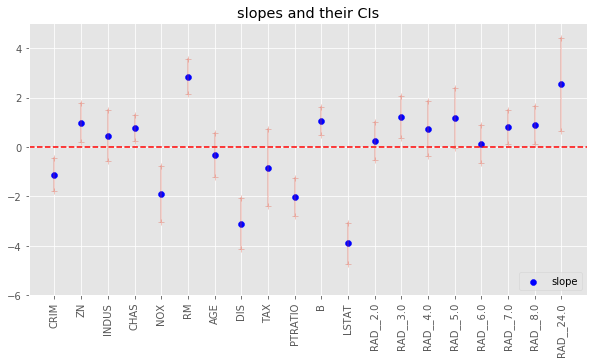

In [41]:
slope_table['y_min'] = slope_table['2.5% confidence'].map(lambda t:(t-y_min)/(y_max-y_min))
slope_table['y_max'] = slope_table['97.5% confidence'].map(lambda t:(t-y_min)/(y_max-y_min))
x = range(1,21)
plt.scatter(x, slope_table['coef'], label='slope', c='b')
plt.axhline(0,linestyle='--', c='r')

for i in x:
    plt.axvline(i, ymin=slope_table['y_min'][i], ymax=slope_table['y_max'][i], marker='+', alpha=0.3)
plt.xticks(x,slope_table.name,rotation='vertical')
plt.ylim((y_min, y_max))
plt.title('slopes and their CIs')
plt.legend(loc=4)